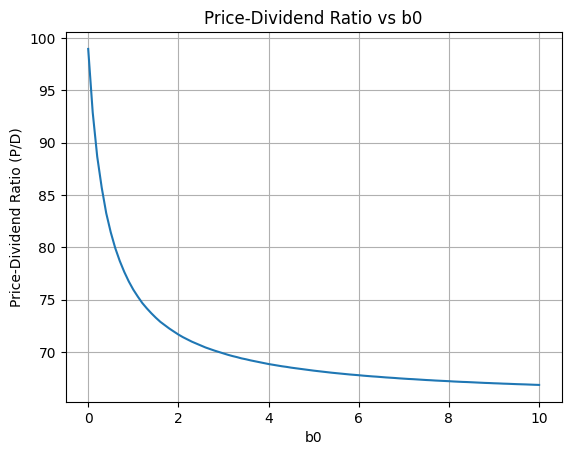

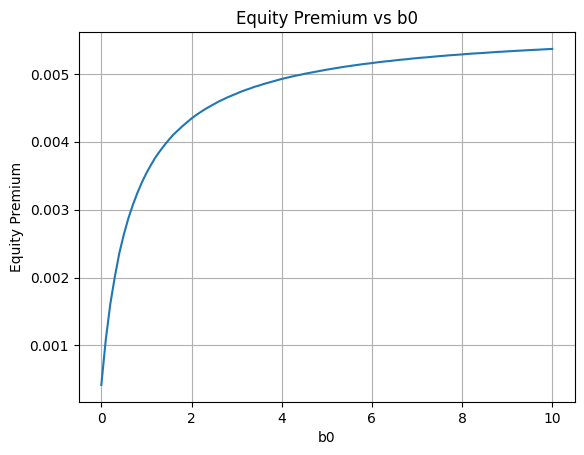

       b0  Price-Dividend Ratio (P/D)  Equity Premium  Simulated Equilibrium x
0     0.0                   98.937198        0.000419                 1.010107
1     0.1                   92.879819        0.001091                 1.010767
2     0.2                   88.658009        0.001615                 1.011279
3     0.3                   85.690377        0.002013                 1.011670
4     0.4                   83.252033        0.002362                 1.012012
..    ...                         ...             ...                      ...
96    9.6                   66.921270        0.005353                 1.014943
97    9.7                   66.907606        0.005356                 1.014946
98    9.8                   66.890533        0.005360                 1.014950
99    9.9                   66.873469        0.005364                 1.014954
100  10.0                   66.859825        0.005367                 1.014957

[101 rows x 4 columns]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters
delta = 0.99
gamma = 1
lambd = 2  # 'lambda' is a reserved keyword in Python

Rf = np.exp(0.0198) / delta  # Risk-free rate

# Simulate consumption growth
num_draws = int(1e4)
epsilon = np.random.randn(num_draws)
g_tilde = np.exp(0.02 + 0.02 * epsilon)  # Consumption growth

# Define utility function v(R)
def v(R):
    if R >= Rf:
        return R - Rf
    else:
        return lambd * (R - Rf)

# Function to compute e(x)
def e_x(x, b0, g_tilde):
    R_tilde = x * g_tilde
    v_vals = np.array([v(R) for R in R_tilde])
    Ev = np.mean(v_vals)
    return delta * b0 * Ev + delta * x - 1

# Bisection search to find x for each b0
b0_values = np.arange(0, 10.1, 0.1)
pd_ratios = []
equity_premiums = []
equilibrium_x_values = []  # List to store simulated equilibrium x values

for b0 in b0_values:
    x_minus = 1.0
    x_plus = 1.1
    
    # Compute e(x_minus) and e(x_plus)
    e_minus = e_x(x_minus, b0, g_tilde)
    e_plus = e_x(x_plus, b0, g_tilde)
    
    # Confirm that e(x_minus) < 0 and e(x_plus) > 0
    if e_minus >= 0 or e_plus <= 0:
        print(f"No solution for b0 = {b0}")
        pd_ratios.append(np.nan)
        equity_premiums.append(np.nan)
        equilibrium_x_values.append(np.nan)  # Append NaN for equilibrium x
        continue
    
    # Bisection method
    tol = 1e-5
    max_iter = 1000
    iter_count = 0
    while True:
        x_0 = 0.5 * (x_minus + x_plus)
        e_0 = e_x(x_0, b0, g_tilde)
        
        if abs(e_0) < tol or iter_count >= max_iter:
            break
        elif e_0 < 0:
            x_minus = x_0
        else:
            x_plus = x_0
        iter_count +=1
    
    # Calculate price-dividend ratio P/D = 1 / (x - 1)
    pd_ratio = 1.0 / (x_0 - 1.0)
    pd_ratios.append(pd_ratio)
    
    # Calculate expected market return E(R_m)
    E_Rm = x_0 * np.exp(0.0202)
    equity_premium = E_Rm - Rf
    equity_premiums.append(equity_premium)
    
    equilibrium_x_values.append(x_0)  # Append the simulated equilibrium x

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'b0': b0_values,
    'Price-Dividend Ratio (P/D)': pd_ratios,
    'Equity Premium': equity_premiums,
    'Simulated Equilibrium x': equilibrium_x_values  # Add simulated equilibrium x to the DataFrame
})

# Plot the results from the DataFrame
plt.figure()
plt.plot(results_df['b0'], results_df['Price-Dividend Ratio (P/D)'])
plt.xlabel('b0')
plt.ylabel('Price-Dividend Ratio (P/D)')
plt.title('Price-Dividend Ratio vs b0')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(results_df['b0'], results_df['Equity Premium'])
plt.xlabel('b0')
plt.ylabel('Equity Premium')
plt.title('Equity Premium vs b0')
plt.grid(True)
plt.show()

print(results_df)